In [1]:
!wget https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv

--2022-09-25 04:50:03--  https://uiuc-ischool-dataviz.github.io/spring2019online/week02/building_inventory.csv
Resolving uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to uiuc-ischool-dataviz.github.io (uiuc-ischool-dataviz.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1994275 (1.9M) [text/csv]
Saving to: ‘building_inventory.csv.4’

building_inventory. 100%[===================>]   1.90M  --.-KB/s    in 0.04s   

2022-09-25 04:50:03 (54.1 MB/s) - ‘building_inventory.csv.4’ saved [1994275/1994275]



In [2]:
%matplotlib inline


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("building_inventory.csv", na_values={
    "Year Acquired": 0,
    "Year Constructed": 0,
    "Square Footage": 0
})

In [5]:
fiter_1 = df['Year Acquired'] > 0 
fiter_2 = df['Year Constructed'] > 0
df = df.loc[(fiter_1)&(fiter_2)].copy()

In [6]:
df

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018.0,2018.0,1455.0,1,0,0,Storage,Storage,NaN
8852,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017.0,2017.0,6720.0,1,0,0,Storage,Utiility & Miscellan,NaN
8853,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019.0,2019.0,760.0,1,0,0,Business,Business,NaN
8854,Department of Transportation,Marion Maintenance Facility - Williamson County,Intersate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019.0,2019.0,760.0,1,0,0,Business,Business,NaN


Text(0.5, 1.0, 'Relationship')

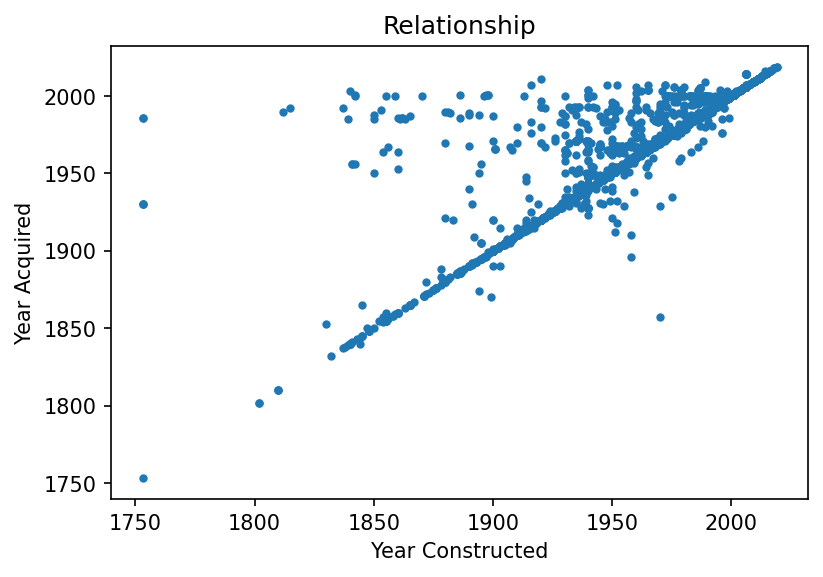

In [7]:
#Relationship between Year constructed and Year Acquired. I have read the csv file into a dataframe called df.
#The NaN values in the dataframe were also turned into zeros so that there will not be any missing vlaues appear in the graph
#Because there could be zero values in both columns year constructed and year acquired, so I filtered rows that contain zeros.
#I used plot in matplotlib to create the graph, the two columns are year constructed and year acquired. 
#I also gave gave x and y two labels as well as a title.
fig, ax = plt.subplots(dpi = 150)
ax.plot(df["Year Constructed"], df["Year Acquired"], '.')
ax.set_xlabel("Year Constructed")
ax.set_ylabel("Year Acquired")
ax.set_title("Relationship")

In [8]:
df2 = df.groupby(df['Congress Dist'])[['Square Footage']].sum()
df2

,Square Footage
Congress Dist,
0,779728.0
1,2324262.0
2,6285684.0
3,1199787.0
4,316234.0
5,1623497.0
6,145659.0
7,9211651.0
8,1461512.0


Text(0.5, 1.0, 'Total Square Footage as a Function of Congressional District')

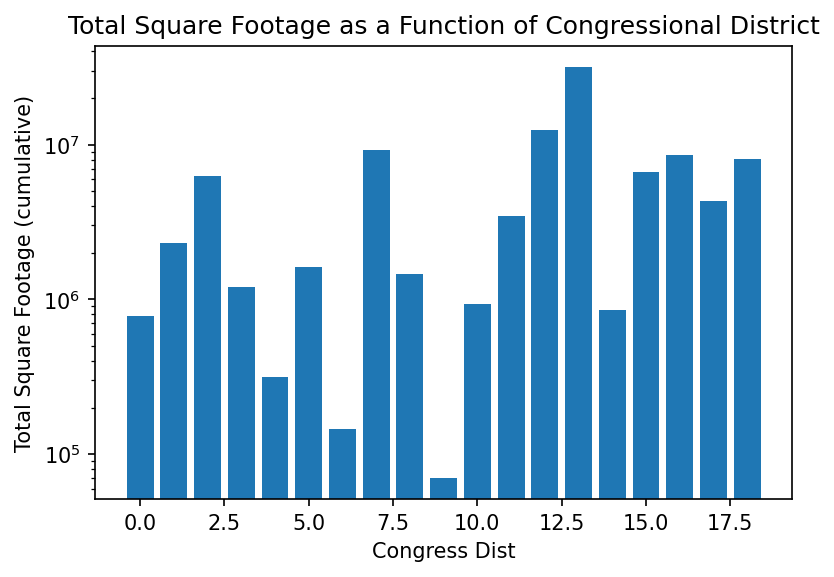

In [9]:
#I have created a new dataframe that only contain the values of Square Footage and Congress Dist from the filtered dataframe
#Then I use .sum() to find out the total square footage for each Congress District.
#In this cell I used bar plot to created this graph that shows total square footage as a function of congressional district
#Since the values of total square footage is too big, so I convert the y scale into log scale.
fig, ax = plt.subplots(dpi = 150)
ax.bar(df2.index,df2["Square Footage"])
ax.set_yscale("log")
ax.set_ylabel("Total Square Footage (cumulative)")
ax.set_xlabel("Congress Dist")
ax.set_title("Total Square Footage as a Function of Congressional District")

In [10]:
df3 = df.groupby(df['Congress Dist'])[['Square Footage','Total Floors']].sum()
df3["Average Square Footage per Floor"] = (df3['Square Footage'] / df3['Total Floors'])
df3

,Square Footage,Total Floors,Average Square Footage per Floor
Congress Dist,,,
0,779728.0,207,3766.801932
1,2324262.0,130,17878.938462
2,6285684.0,642,9790.785047
3,1199787.0,69,17388.217391
4,316234.0,19,16643.894737
5,1623497.0,108,15032.379630
6,145659.0,28,5202.107143
7,9211651.0,517,17817.506770
8,1461512.0,311,4699.395498


Text(0.5, 1.0, 'Average square footage per floor as a function of congressional district')

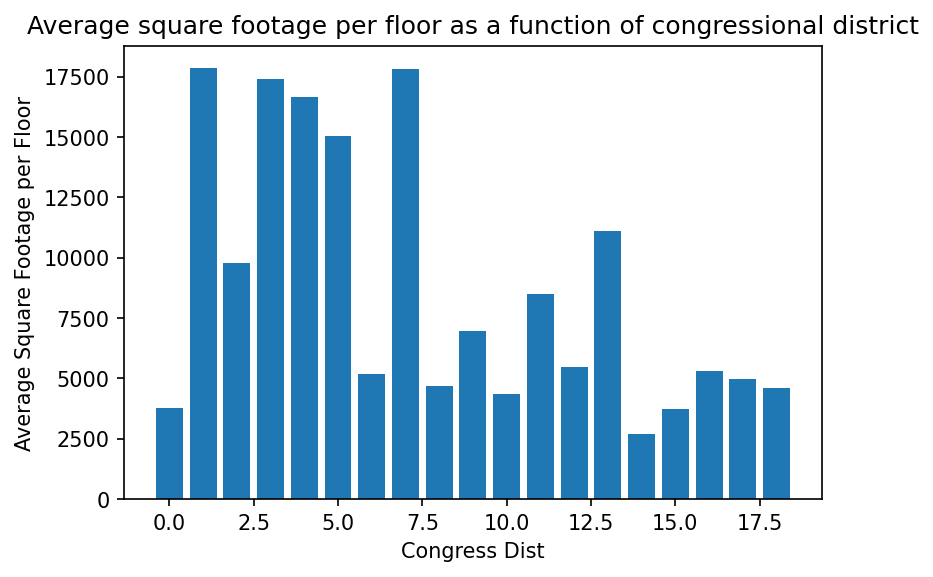

In [11]:
#I have grouped by congress district, which is now the index of new dataframe, and found the sum of both square footage and total floors
#Then I divided the total square footage by the total floors, and created a new column named "Average Square Footage per Floor" to store the results
#In this cell, I used bar chart to show the average square footage per floor as a function of congressional district
#And I have added proper labels for x and y scales, as well as a title.
fig, ax = plt.subplots(dpi = 150)
ax.bar(df3.index,df3["Average Square Footage per Floor"])
ax.set_ylabel("Average Square Footage per Floor")
ax.set_xlabel("Congress Dist")
ax.set_title("Average square footage per floor as a function of congressional district")

In [12]:
df['Agency Name'].value_counts()[:5]

Department of Natural Resources    3044
Department of Corrections          1408
Department of Transportation       1074
Department of Human Services        612
University of Illinois              524
Name: Agency Name, dtype: int64

In [13]:
df4 = df[df['Agency Name'].isin(['Department of Corrections',
                                 'Department of Natural Resources',
                                 'Department of Transportation',
                                 'Department of Human Services',
                                 'University of Illinois'])].reset_index(drop = True)
df4

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,Department of Transportation,Aledo Salt Storage Building - Mercer County,1610 3rd Street,Aledd,61231,Mercer,17,Cheri Bustos,74,Swanson Daniel,...,In Progress,2018.0,2018.0,1455.0,1,0,0,Storage,Storage,NaN
6658,Department of Transportation,Biggsville - Henderson County,Route 1,Biggsville,61418,Henderson,17,Cheri Bustos,94,Frese Randy E.,...,In Progress,2018.0,2018.0,1455.0,1,0,0,Storage,Storage,NaN
6659,Department of Transportation,Decatur Maintenance Facility - Macon County,4142 N. Westlawn Avenue,Decatur,62526,Macon,4,Luis Gutierrez,4,Soto Cynthia,...,In Progress,2017.0,2017.0,6720.0,1,0,0,Storage,Utiility & Miscellan,NaN
6660,Department of Transportation,Marion Maintenance Facility - Williamson County,Interstate 57 Milepost 46,Marion,62959,Williamson,12,Mike Bost,117,Severin Dave,...,In Progress,2019.0,2019.0,760.0,1,0,0,Business,Business,NaN


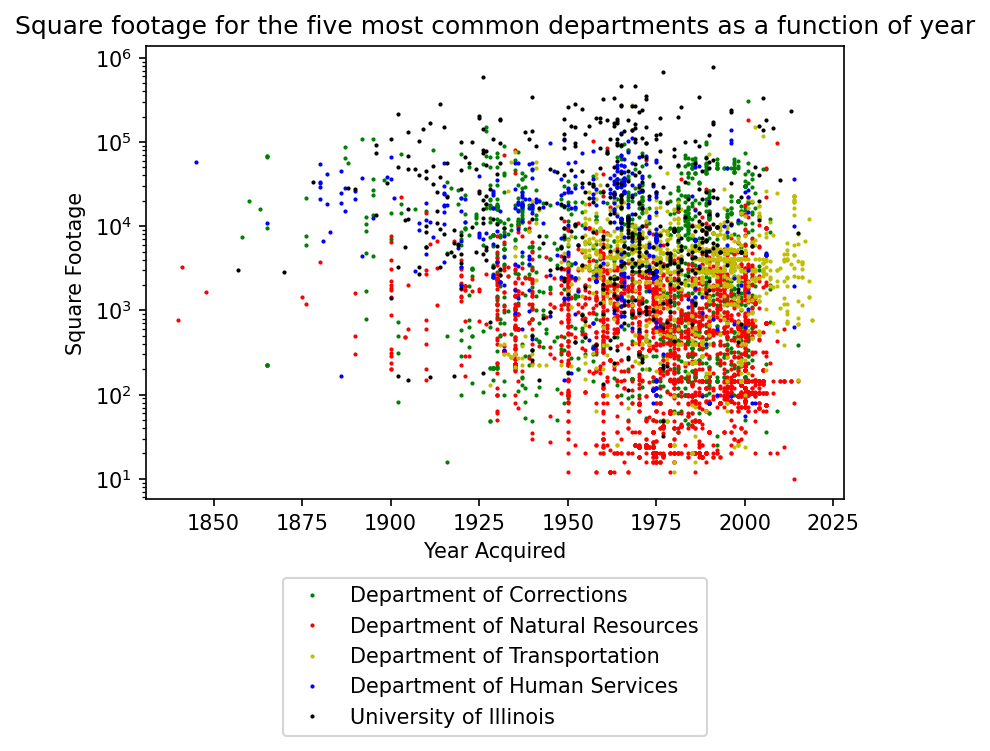

In [49]:
#I found the top 5 most common department by using value_counts
#Then I created a new dataframe that only contain the five most common departments that I found in the last step
#In this cell, I have decided to use dot plots to shows the relationship
#I have used differen colors for each department. I have also changed the size of dots so they seems more clear
#I have added proper labels for x and y scales, as well as a title
#Finally, to better demostrate the differences between each department, I have added a legend to show what the representation of each color
fig, ax = plt.subplots(dpi = 150)
ax.plot(df4[df4['Agency Name'] == 'Department of Corrections']['Year Acquired'], df4[df4['Agency Name'] == 'Department of Corrections']['Square Footage'], '.', color = 'g',markersize=2, label = 'Department of Corrections')
ax.plot(df4[df4['Agency Name'] == 'Department of Natural Resources']['Year Acquired'], df4[df4['Agency Name'] == 'Department of Natural Resources']['Square Footage'], '.', color = 'r',markersize=2, label = 'Department of Natural Resources')
ax.plot(df4[df4['Agency Name'] == 'Department of Transportation']['Year Acquired'], df4[df4['Agency Name'] == 'Department of Transportation']['Square Footage'], '.', color = 'y',markersize=2, label = 'Department of Transportation')
ax.plot(df4[df4['Agency Name'] == 'Department of Human Services']['Year Acquired'], df4[df4['Agency Name'] == 'Department of Human Services']['Square Footage'], '.', color = 'b',markersize=2, label = 'Department of Human Services')
ax.plot(df4[df4['Agency Name'] == 'University of Illinois']['Year Acquired'], df4[df4['Agency Name'] == 'University of Illinois']['Square Footage'], '.', color = 'k',markersize=2, label = 'University of Illinois')
ax.set_yscale("log")
ax.set_ylabel("Square Footage")
ax.set_xlabel("Year Acquired")
ax.set_title("Square footage for the five most common departments as a function of year")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))